In [296]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Load la matrice d'expression et les metadata**

In [297]:
X = pd.read_csv("../data/THCA_expression_matrix_final.csv", index_col=0)
X = X.T

In [298]:
X.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=39ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=57ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=62ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=32ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12


### ajout des metadata à la matrice d'expression

In [299]:
labels = pd.Index(X.index)   # index = patients

age = (
    labels
    .str.extract(r"AGE=(\d+)ANS")[0]
    .astype(float))

sex = (
    labels
    .str.extract(r"SEX=([a-zA-Z]+)")[0]
    .str.lower()
    .map({"male": 1, "female": 0}))

# ATTENTION !! Eviter d'utiliser les metadata suivantes dans X_full. 
# elles sont ajoutées seulement si on en a besoin pour un modèle

stage = (
    labels
    .str.extract(r"STAGE=([^_]+_[^_]+)")[0]) # ne pas ajouter à X_full

stage_map = {
    "Stade_I": 0,
    "Stade_II": 1,
    "Stade_III": 2,
    "Stade_IV": 3
} # ne pas ajouter à X_full
stage_enc = stage.map(stage_map)

mutation = (
    labels
    .str.extract(r"MUT=([^_]+)")[0]) # ne pas ajouter à X_full


X_full = X.copy()
X_full["age"] = age.values
X_full["sex"] = sex.values

X_full

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,age,sex
ID=TCGA-DJ-A2Q6_AGE=39ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,26,0,0,0,714,0,7,31,39.0,0
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,10,0,0,0,598,0,5,22,31.0,0
ID=TCGA-DJ-A2QA_AGE=57ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,3,0,0,0,144,0,0,31,57.0,0
ID=TCGA-FY-A2QD_AGE=62ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,9,0,0,0,603,0,2,11,62.0,0
ID=TCGA-EL-A3GR_AGE=32ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,5,0,0,0,365,0,3,12,32.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4742,3,2172,1171,245,372,5861,3069,1740,2560,...,29,0,0,0,377,0,3,23,47.0,0
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3753,4,1491,962,166,184,1663,2433,1244,1713,...,59,0,0,0,489,0,17,3,78.0,1
ID=TCGA-DJ-A3UX_AGE=47ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4488,5,2061,1151,250,775,9620,2795,2425,2753,...,24,0,0,0,539,0,6,11,47.0,0
ID=TCGA-DJ-A2PX_AGE=55ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,6131,6,2439,1213,242,1076,8511,3439,3132,2428,...,8,0,0,0,458,0,4,35,55.0,0


# **Définition de la cible qu'on cherche à prédire**

voir si on peut pas accumuler plusieurs prédictions par la suite

Choisissez la variable que vous voulez prédire en remplacant "choix" par le nom de la liste que vous voulez :

In [347]:
liste_des_prédictions = ["stade_tumoral", "type_tumoral", "mutation"]
choix = "mutation"

### _**préparation des inputs + labels du modèle**_

Pour prédire le stade tumoral on va prédire 1 état parmi 2 possibilités : 
- **0** : stade précoce (stade I et II)
- **1** : stade avancé (stade III et IV) 
c'est utile de regrouper les stades en 2 catégories car il y a peu de patients dans les stades III et IV, ca permet d'avoir un dataset plus équilibré pour l'entrainement du modèle.


ici, j'ai crée une fonction qui réuni les 3 prédictions qu'on voudrait faire. 
Pour chaque prédiction, la variable cible est identifiée (comme label)

In [348]:
from sklearn.preprocessing import LabelEncoder

def build_task(choix, X):
    labels_index = pd.Index(X.index)
    X_out = X.copy()

    if choix == "stade_tumoral":
        # extraire le stade depuis le nom
        stade = pd.Series(stage.values, index=X_out.index)

        # garder uniquement les patients avec un stade défini
        mask = stade != "Stage_NA"
        X_out = X_out.loc[mask]

        # early vs late
        labels = stade.loc[mask].isin(
            ["Stade_III", "Stade_IV"]
        ).astype(int).values

        class_names = ["Early", "Late"]
        n_classes = 2
        loss = "binary_crossentropy"
        output_activation = "sigmoid"
        encoder = None
    
    elif choix == "type_tumoral":
        tumor_type = pd.Series(labels_index.str.extract(r"TYPE=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(tumor_type)
        
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    elif choix == "mutation":
        mutation = pd.Series(labels_index.str.extract(r"MUT=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(mutation)
        
    
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    else:
        raise ValueError(
            "le choix doit etre 'stade_tumoral', 'type_tumoral' ou 'mutation'"
        )

    return X_out.values, labels, encoder, loss, class_names, n_classes, output_activation

X_out, labels, encoder, loss, class_names, n_classes, output_activation = build_task(choix, X_full)

In [349]:
print(f"les labels de {choix} : \n{labels}")

les labels de mutation : 
[0 2 0 2 0 0 0 0 0 0 3 0 2 2 0 2 2 3 0 2 0 0 0 2 0 0 2 3 0 3 3 0 0 0 2 2 0
 2 0 0 0 2 0 2 2 0 0 0 3 0 0 0 3 0 2 2 0 0 2 0 2 0 0 2 2 0 0 3 0 2 0 0 0 2
 2 2 2 0 0 0 0 2 0 0 1 3 0 2 0 2 2 0 2 2 0 2 3 2 3 2 0 2 3 2 3 2 2 2 2 0 2
 2 2 0 0 3 2 2 2 0 2 0 0 2 2 0 0 3 2 0 2 0 2 3 2 2 2 0 3 2 3 0 0 2 2 0 2 0
 2 0 0 2 2 2 0 2 2 2 2 3 0 0 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 2 2 0 2 0 2 0 3
 0 2 2 0 0 2 2 0 0 0 2 2 1 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 2 0 2 1 3 1
 0 2 0 2 2 0 2 2 3 2 0 0 2 2 0 3 2 0 2 0 2 2 3 0 2 0 0 2 0 2 0 0 2 0 3 0 0
 0 3 2 0 3 3 0 2 2 0 0 2 0 2 3 2 0 0 0 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 3 0 2
 0 2 0 0 2 0 2 0 2 2 3 0 0 2 2 2 3 2 2 2 0 2 2 0 2 0 3 2 2 3 0 0 0 0 0 2 3
 0 2 2 2 0 2 2 2 2 2 2 0 2 0 0 3 0 3 0 2 3 3 0 0 0 0 3 0 0 2 2 0 0 0 0 0 2
 2 0 2 0 2 3 0 2 0 0 0 2 2 2 0 0 2 2 2 2 0 2 0 2 2 0 3 0 2 2 0 2 0 0 0 2 2
 0 2 1 2 2 2 2 2 0 2 2 0 0 0 2 3 2 2 0 0 3 2 0 2 2 0 2 2 0 0 3 0 2 0 0 2 2
 0 2 0 2 2 0 0 0 3 2 0 2 0 2 0 2 2 2 2 2 0 0 3 0 0 0 0 2 0 2 2 0 3 2 2 2 2

In [350]:
print(f"l'input de la matrice d'expression pour {choix} : \n{X_out}")

l'input de la matrice d'expression pour mutation : 
[[6.156e+03 7.000e+00 2.540e+03 ... 3.100e+01 3.900e+01 0.000e+00]
 [7.191e+03 3.000e+00 3.815e+03 ... 2.200e+01 3.100e+01 0.000e+00]
 [2.219e+03 1.000e+00 7.350e+02 ... 3.100e+01 5.700e+01 0.000e+00]
 ...
 [4.488e+03 5.000e+00 2.061e+03 ... 1.100e+01 4.700e+01 0.000e+00]
 [6.131e+03 6.000e+00 2.439e+03 ... 3.500e+01 5.500e+01 0.000e+00]
 [4.097e+03 4.000e+00 2.218e+03 ... 3.100e+01 2.200e+01 0.000e+00]]


In [351]:
print(f"les classes qu'on veut prédire de {choix} sont : \n{class_names}")

les classes qu'on veut prédire de mutation sont : 
['BRAF', 'EIF1AX', 'NO', 'RAS']


# **Preprocessing**

il faut réduire le nombre de features (gènes) pour éviter l'overfitting et améliorer les performances du modèle. On peut utiliser des techniques comme la sélection de caractéristiques basées sur l'importance des gènes, ou des méthodes de réduction de dimensionnalité comme juste prendre les gènes les + exprimés, si on a le temps faudrait utiliser un autoendeur !!!!!.

In [352]:
# récupérer les noms
gene_names = X_full.columns[:-2]
meta_names = X_full.columns[-2:]

X_expr = X_out[:, :-2]   # gènes uniquement
X_meta = X_out[:, -2:]   # age, sex

# filtrage variance
variances = X_expr.var(axis=0)
k = 5000
top_idx = np.argsort(variances)[-k:]
selected_genes = gene_names[top_idx]

# reconstruire DataFrame
X_expr_filt = X_expr[:, top_idx]

X_reduced = pd.DataFrame(
    np.hstack([X_expr_filt, X_meta]),
    # index=X_full.index[:X_expr_filt.shape[0]], # indice décalé pour stage tumoral parce que on a retiré 45 patients, on l'enleve, c'est plus important
    columns=list(selected_genes) + list(meta_names)
)


X_reduced

,ENSG00000100028.12,ENSG00000258289.8,ENSG00000101210.13,ENSG00000132716.19,ENSG00000105397.14,ENSG00000165434.8,ENSG00000136754.18,ENSG00000197771.13,ENSG00000163344.6,ENSG00000198053.12,...,ENSG00000211896.7,ENSG00000211592.8,ENSG00000198938.2,ENSG00000210082.2,ENSG00000198886.2,ENSG00000198804.2,ENSG00000115414.21,ENSG00000042832.12,age,sex
0,6107.0,6312.0,42.0,5046.0,5504.0,3981.0,6431.0,6469.0,4300.0,2585.0,...,70179.0,88333.0,364170.0,494913.0,524661.0,891163.0,1722652.0,2131062.0,39.0,0.0
1,4335.0,3489.0,92.0,3934.0,5787.0,13910.0,6623.0,5569.0,4129.0,2223.0,...,14425.0,10476.0,131377.0,134770.0,150668.0,291615.0,622736.0,2150009.0,31.0,0.0
2,1391.0,970.0,25.0,3019.0,2124.0,574.0,1065.0,1452.0,5787.0,634.0,...,5079.0,6872.0,168881.0,195922.0,166924.0,189345.0,90318.0,2485163.0,57.0,0.0
3,5379.0,3194.0,0.0,2811.0,2382.0,1116.0,3509.0,3757.0,2759.0,201.0,...,14883.0,4352.0,128580.0,134838.0,170294.0,253610.0,6043.0,4231112.0,62.0,0.0
4,2814.0,3442.0,169.0,2419.0,3190.0,4128.0,4187.0,3494.0,2204.0,2071.0,...,6682.0,5576.0,109789.0,106100.0,175456.0,267877.0,991447.0,874404.0,32.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,3928.0,2516.0,16.0,4368.0,5436.0,1317.0,3219.0,3303.0,4927.0,2273.0,...,51259.0,39394.0,228389.0,182703.0,283778.0,397220.0,181019.0,2084062.0,47.0,0.0
501,3228.0,1538.0,3.0,5221.0,4585.0,878.0,2748.0,2480.0,3929.0,342.0,...,84.0,88.0,226680.0,245896.0,386679.0,616970.0,5605.0,3683187.0,78.0,1.0
502,4738.0,3970.0,63.0,4086.0,4821.0,1127.0,4080.0,4601.0,3212.0,1832.0,...,214328.0,129739.0,491447.0,314334.0,510406.0,772270.0,324850.0,2993363.0,47.0,0.0
503,3736.0,3499.0,12.0,4324.0,4423.0,907.0,4974.0,4134.0,3905.0,1973.0,...,924718.0,897905.0,317812.0,281066.0,477236.0,776891.0,154139.0,2877400.0,55.0,0.0


# **Split les données train et test**

protection contre les classes avec trop peu d'échantillons : 

In [353]:
min_samples = 5  

counts = pd.Series(labels).value_counts()
valid_classes = counts[counts >= min_samples].index

mask = pd.Series(labels).isin(valid_classes)

X_reduced = X_reduced.loc[mask.values]
labels = labels[mask.values]

splitting

In [354]:
# Split train/validation/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_reduced, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")



Tailles des ensembles:
Train: 353
Validation: 76
Test: 76


In [355]:
# séparer les metadata
X_train_expr = X_train.iloc[:, :-2]
X_test_expr = X_test.iloc[:, :-2]
X_val_expr = X_val.iloc[:, :-2]


# log transform
X_train_log = np.log1p(X_train_expr)
X_test_log  = np.log1p(X_test_expr)
X_val_log  = np.log1p(X_val_expr)

# scaler (FIT SUR LE TRAIN UNIQUEMENT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)
X_val_scaled  = scaler.transform(X_val_log)

# recombiner 
X_train_final = np.hstack([X_train_scaled, X_train.iloc[:, -2:].values])
X_val_final   = np.hstack([X_val_scaled,   X_val.iloc[:, -2:].values])
X_test_final  = np.hstack([X_test_scaled,  X_test.iloc[:, -2:].values])

In [356]:
# encode labels si nécessaire
# if labels.dtype == object:
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test  = label_encoder.transform(y_test)
#     n_classes = len(label_encoder.classes_)
# else:
#     n_classes = len(np.unique(y_train))

# **Modèle dense à 4 couches**

In [357]:
def build_backbone(input_dim):
    inputs = keras.Input(shape=(input_dim,))
    
    x = keras.layers.Dense(512, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(1e-3))(inputs)
    x = keras.layers.Dropout(0.3)(x)
    
    x = keras.layers.Dense(256, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(1e-3))(x)
    x = keras.layers.Dropout(0.3)(x)
    
    x = keras.layers.Dense(128, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(1e-3))(x)
    
    return inputs, x

In [358]:
def build_model(input_dim, n_classes, output_activation, loss):
    inputs, features = build_backbone(input_dim)

    outputs = keras.layers.Dense(
        n_classes if output_activation == "softmax" else 1,
        activation=output_activation
    )(features)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [359]:
model = build_model(
    input_dim=X_train_final.shape[1],
    n_classes=n_classes,
    output_activation=output_activation,
    loss=loss
)

In [360]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 5002)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │     2,561,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,726,276 (10.40 MB)

 Trainable params: 2,726,276 (10.40 MB)

 Non-trainable params: 0 (0.00 B)

# **Training**

In [361]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

training_history = model.fit(
    X_train_final,
    y_train,
    validation_data=(X_val_final, y_val),
    epochs=200,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4788 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4533 - loss: nan - val_accuracy: 0.4474 - val_loss: nan
Epoch 9/200
23/23 ━━━━━━

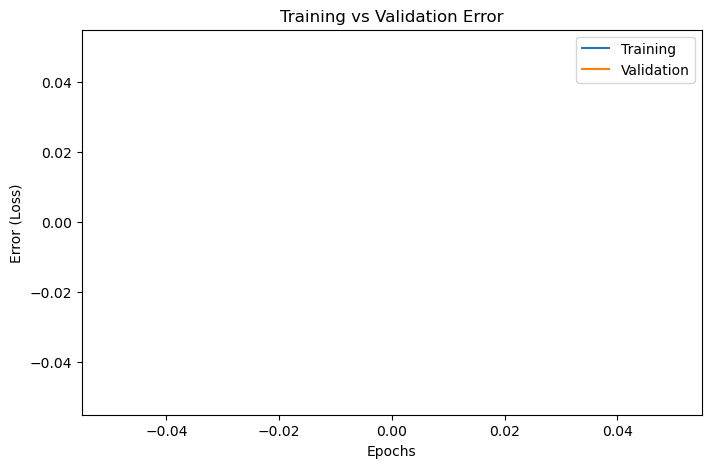

In [362]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'], label='Training')
plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

# **Test**

In [363]:
def predict_classes(model, X, choix):
    probs = model.predict(X)

    if choix == "stade_tumoral":
        # binaire
        preds = (probs.flatten() >= 0.5).astype(int)
    else:
        # multi-classes
        preds = np.argmax(probs, axis=1)

    return probs, preds

# **Evaluation and validation**

In [364]:
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report
)

def evaluate_model(y_true, y_pred, class_names=None, title="Confusion matrix"):

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    # noms des classes
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print("Evaluation summary:")
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision (macro): {precision:.3f}")
    print(f" Recall (macro):    {recall:.3f}")
    print(f" F1-score (macro):  {f1:.3f}")
    print("\nDetailed classification report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return cm_df

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


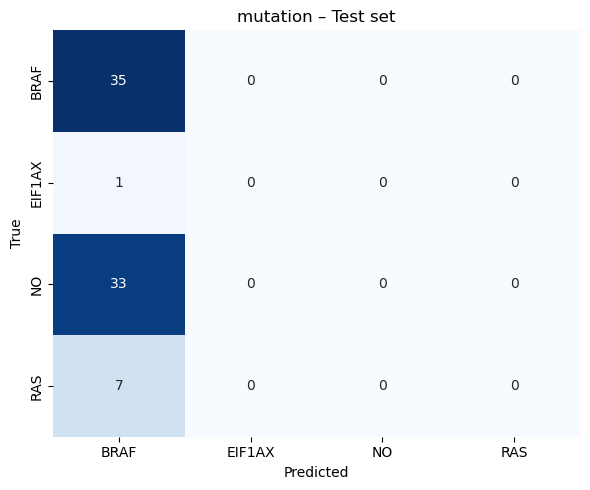

Evaluation summary:
 Accuracy:  0.461
 Precision (macro): 0.115
 Recall (macro):    0.250
 F1-score (macro):  0.158

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.46      1.00      0.63        35
      EIF1AX       0.00      0.00      0.00         1
          NO       0.00      0.00      0.00        33
         RAS       0.00      0.00      0.00         7

    accuracy                           0.46        76
   macro avg       0.12      0.25      0.16        76
weighted avg       0.21      0.46      0.29        76



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,BRAF,EIF1AX,NO,RAS
BRAF,35,0,0,0
EIF1AX,1,0,0,0
NO,33,0,0,0
RAS,7,0,0,0


In [365]:
_, y_train_pred = predict_classes(model, X_train_final, choix)
_, y_test_pred  = predict_classes(model, X_test_final, choix)

evaluate_model(
    y_test,
    y_test_pred,
    class_names=class_names,
    title=f"{choix} – Test set"
)

In [366]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report
)

def evaluate_and_save_pdf(
    y_true,
    y_pred,
    class_names,
    choix,
    output_dir="../results"
):
    # --- sécurité dossier ---
    os.makedirs(output_dir, exist_ok=True)

    # --- métriques ---
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    report = classification_report(
        y_true, y_pred, target_names=class_names
    )

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    pdf_path = f"{output_dir}/evaluation_{choix}.pdf"

    with PdfPages(pdf_path) as pdf:

        # ===== PAGE 1 : Confusion matrix =====
        fig1, ax1 = plt.subplots(figsize=(7, 6))
        sns.heatmap(
            cm_df,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            ax=ax1
        )
        ax1.set_title(f"Confusion Matrix – {choix}")
        ax1.set_xlabel("Predicted")
        ax1.set_ylabel("True")
        fig1.tight_layout()
        pdf.savefig(fig1)
        plt.close(fig1)

        # ===== PAGE 2 : Metrics =====
        fig2, ax2 = plt.subplots(figsize=(8, 10))
        ax2.axis("off")

        summary_text = (
            f"Task: {choix}\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n"
        )

        ax2.text(
            0.01, 0.98,
            summary_text,
            va="top",
            ha="left",
            fontsize=11
        )

        ax2.text(
            0.01, 0.60,
            report,
            va="top",
            ha="left",
            fontsize=9,
            family="monospace"
        )

        ax2.set_title(f"Evaluation metrics – {choix}", fontsize=14)
        fig2.tight_layout()
        pdf.savefig(fig2)
        plt.close(fig2)

    print(f"PDF sauvegardé : {pdf_path}")

In [367]:
evaluate_and_save_pdf(
    y_true=y_test,
    y_pred=y_test_pred,
    class_names=class_names,
    choix=choix
)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

PDF sauvegardé : ../results/evaluation_mutation.pdf


In [368]:
pd.Series(labels).value_counts()

0    229
2    220
3     51
1      5
Name: count, dtype: int64

In [369]:
print("Train:", pd.Series(y_train).value_counts())
print("Val  :", pd.Series(y_val).value_counts())
print("Test :", pd.Series(y_test).value_counts())

Train: 0    160
2    154
3     36
1      3
Name: count, dtype: int64
Val  : 0    34
2    33
3     8
1     1
Name: count, dtype: int64
Test : 0    35
2    33
3     7
1     1
Name: count, dtype: int64


In [370]:
assert X_reduced.shape[0] == len(labels)

In [371]:
print(np.unique(y_train))
print(np.unique(y_val))
print(np.unique(y_test))

[0 1 2 3]
[0 1 2 3]
[0 1 2 3]


In [372]:
y_test_proba = model.predict(X_test_final)
y_test_proba[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]], dtype=float32)